# NAME - SHRINIDHI SUNDARAVADIVELU


<p style="font-family: Arial; font-size:1.4em;color:blue;">Importing the necessary packages </p>

In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
import csv
%matplotlib inline
import warnings

------------------------------------------------------------------------------------------------------------------------------

## TASK 1: DATA IDENTIFICATION
 
<p style="font-family: Arial; font-size:1.4em;color:blue;"> Chosen Web API </p>

* The API chosen for this assignment is provided by Zomato and its website is https://www.zomato.com/

* The details of the API is documented in the site https://developers.zomato.com/api

* The API key is generated upon signing up and it is restricted to 1000 API calls per day

* The API key which I'm using here is b5c8cf702662495ed88fef533900801b


In [2]:
#The URL from which the data is going to be fetched
url = "https://developers.zomato.com/api/v2.1/"
api_key = "b5c8cf702662495ed88fef533900801b"
# A part of the link that specifies that the output is obtained in json format
headers = {'Accept': 'application/json', 'user-key': api_key}
headers

{'Accept': 'application/json', 'user-key': 'b5c8cf702662495ed88fef533900801b'}

------------------------------------------------------------------------------------------------------------------------------

## TASK 2: DATA COLLECTION

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Collecting Raw Data </p>

* Zomato is widely used in India (Country in South Asia). Hence, data corresponds to the restaurants in India
* I'm fetching the deatils for five major cities in India namely Chennai, Bangalore, Hyderabad, Kochi, Mumbai
* Each city has a corresponding entity ID's and that is fectched from /locations API call
* The entity id is passes as a parameter in the API call, thereby obtaining the top 100 restaurants in the city which are sorted according to the rating
* The entity ID's I've used are : {Chennai:6008},{Bangalore:5103},{Hyderabad:7031},{Kochi:9067},{Mumbai:2121}
* Data is fetched for each city and stored in a list

In [3]:
#API calls for fetching the data
#loop runs 5 times, so the top 100 restaurants can be obtained
content1 = []
content2 = []
content3 = []
content4 = []
content5 = []
for i in range(0, 120, 20):
    req1 = requests.get(url + "search?entity_id=6008&entity_type=subzone&start="+str(i)+"&count=20&sort=rating", headers=headers).json()
    content1+= req1['restaurants']
    req2 = requests.get(url + "search?entity_id=5103&entity_type=subzone&start="+str(i)+"&count=20&sort=rating", headers=headers).json()
    content2+= req2['restaurants']
    req3 = requests.get(url + "search?entity_id=7031&entity_type=subzone&start="+str(i)+"&count=20&sort=rating", headers=headers).json()
    content3+= req3['restaurants']
    req4 = requests.get(url + "search?entity_id=9067&entity_type=subzone&start="+str(i)+"&count=20&sort=rating", headers=headers).json()
    content4+= req4['restaurants']
    req5 = requests.get(url + "search?entity_id=2121&entity_type=subzone&start="+str(i)+"&count=20&sort=rating", headers=headers).json()
    content5+= req5['restaurants']

In [4]:
# The collected data is converted from dictionary to JSON string data format
text1 = json.dumps(content1, sort_keys=True, indent=4)
text2 = json.dumps(content2, sort_keys=True, indent=4)
text3 = json.dumps(content3, sort_keys=True, indent=4)
text4 = json.dumps(content4, sort_keys=True, indent=4)
text5 = json.dumps(content5, sort_keys=True, indent=4)

# The JSON strings are stored in the mentioned files
datafile=open("Chenani_data.json",'w')
datafile.write(text1)
datafile.close()
datafile=open("Bangalore_data.json",'w')
datafile.write(text2)
datafile.close()
datafile=open("Hyderabad_data.json",'w')
datafile.write(text3)
datafile.close()
datafile=open("Kochi_data.json",'w')
datafile.write(text4)
datafile.close()
datafile=open("Mumbai_data.json",'w')
datafile.write(text5)
datafile.close()

------------------------------------------------------------------------------------------------------------------------------


<p style="font-family: Arial; font-size:1.4em;color:blue;"> Normalising the data and writing data to a CSV </p>

In [5]:
# Data fetched is normalised and is stored as a dataframe 
df1 = json_normalize(content1, sep='_')
df2 = json_normalize(content2, sep='_')
df3 = json_normalize(content3, sep='_')
df4 = json_normalize(content4, sep='_')
df5 = json_normalize(content5, sep='_')

In [6]:
#The dataframes are combined and stored as a single dataframe
frames = [df1, df2, df3, df4, df5]
result = pd.concat(frames)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#The dataframe is converted to a CSV and stored in the mentioned file
# It is a raw file which needs cleaning and filtering for analysis
result.to_csv('Cities_data(unfiltered).csv')

------------------------------------------------------------------------------------------------------------------------------

## TASK 3: DATA FILTERING & CLEANSING

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Parsing raw data </p>

In [8]:
# The column names of the data in the dataframe are:
for col in result.columns:
    print(col)

restaurant_R_has_menu_status_delivery
restaurant_R_has_menu_status_takeaway
restaurant_R_res_id
restaurant_all_reviews_count
restaurant_all_reviews_reviews
restaurant_apikey
restaurant_average_cost_for_two
restaurant_book_again_url
restaurant_book_form_web_view_url
restaurant_book_url
restaurant_cuisines
restaurant_currency
restaurant_deeplink
restaurant_establishment
restaurant_establishment_types
restaurant_events_url
restaurant_featured_image
restaurant_has_online_delivery
restaurant_has_table_booking
restaurant_highlights
restaurant_id
restaurant_include_bogo_offers
restaurant_is_book_form_web_view
restaurant_is_delivering_now
restaurant_is_table_reservation_supported
restaurant_is_zomato_book_res
restaurant_location_address
restaurant_location_city
restaurant_location_city_id
restaurant_location_country_id
restaurant_location_latitude
restaurant_location_locality
restaurant_location_locality_verbose
restaurant_location_longitude
restaurant_location_zipcode
restaurant_medio_provide

In [9]:
#Number of rows and columns of the raw data
nRow, nCol = result.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 64 columns


In [10]:
#Taking only the necessary columns and storing it in a new dataframe
inter = result.filter(['restaurant_R_res_id',
'restaurant_all_reviews_count',
'restaurant_average_cost_for_two',
'restaurant_cuisines',
'restaurant_has_online_delivery',
'restaurant_location_address',
'restaurant_location_city',
'restaurant_location_locality_verbose',
'restaurant_name',
'restaurant_phone_numbers',
'restaurant_price_range',
'restaurant_timings',
'restaurant_user_rating_aggregate_rating',
'restaurant_user_rating_rating_text',
'restaurant_user_rating_votes',
'restaurant_location_latitude',
'restaurant_location_longitude',
'restaurant_establishment',
'restaurant_user_rating_rating_color'],axis=1)

In [11]:
#checking the datatype of the new variable 
type(inter)

pandas.core.frame.DataFrame

In [12]:
# Displaying the new variable

inter

,restaurant_R_res_id,restaurant_all_reviews_count,restaurant_average_cost_for_two,restaurant_cuisines,restaurant_has_online_delivery,restaurant_location_address,restaurant_location_city,restaurant_location_locality_verbose,restaurant_name,restaurant_phone_numbers,restaurant_price_range,restaurant_timings,restaurant_user_rating_aggregate_rating,restaurant_user_rating_rating_text,restaurant_user_rating_votes,restaurant_location_latitude,restaurant_location_longitude,restaurant_establishment,restaurant_user_rating_rating_color
0,69116,378,100,Street Food,1,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Chennai,"Triplicane, Chennai",Bombay Lassi,044 28510364,1,10 AM – 10 PM,4.7,Excellent,1006,13.0656156277,80.2709348872,[],3F7E00
1,18619095,1642,1000,"North Indian, Chinese, Arabian, BBQ, Biryani, ...",1,"99/59, Pantheon Road, Opposite Museum, Egmore,...",Chennai,"Egmore, Chennai",Palmshore,"044 41004100, 044 48589990",3,11:30 AM to 1 AM,4.6,Excellent,2163,13.0694550655,80.2570836246,[Casual Dining],3F7E00
2,68908,286,300,"South Indian, Desserts, Beverages",0,"112/241, Purasawalkam High Road, Purasavakkam,...",Chennai,"Purasavakkam, Chennai",Welcome Hotel,"044 26421534, 044 26433626, +91 9094795325",1,6 AM to 10 PM,4.5,Excellent,1048,13.0856211345,80.2546411380,[Quick Bites],3F7E00
3,19209248,77,1000,"Cafe, Italian, French, European, American, Piz...",1,"47, Halls Road, Chennai Corp Ward, Egmore, Che...",Chennai,"Egmore, Chennai",Fromage,"+91 9940418017, +91 9652614156, +91 9884455330",3,11 AM to 11 PM,4.5,Excellent,99,13.0714325683,80.2544842288,[Café],3F7E00
4,18423045,146,400,"Ice Cream, Desserts",1,"3, Varadarajulu Street, Egmore, Chennai",Chennai,"Egmore, Chennai",Shmoozie's Hand-Crafted Ice Creams,+91 8248311929,1,"11 AM to 7 PM (Tue-Sun), Mon Closed",4.5,Excellent,312,13.0781530198,80.2557509020,[Dessert Parlour],3F7E00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19085779,26,450,"Desserts, Beverages",1,"Phoenix Marketcity, S-45, 2nd Floor, LBS Marg,...",Mumbai,"Phoenix Marketcity, Kurla, Mumbai",Blue Basil,+91 9819912318,1,11 AM to 11 PM,3.9,Good,37,19.0874328600,72.8886642500,[Dessert Parlour],9ACD32
96,18969370,39,700,"Desserts, Ice Cream, Beverages",0,"Kurla, Mumbai",Mumbai,"Kurla, Mumbai",Smiley Pops,+91 9152239619,2,11 AM to 3 AM,3.9,Good,45,19.0851854200,72.8907208000,[Dessert Parlour],9ACD32
97,19338947,0,200,Paan,1,"Phoenix Mall, Lbs Road, Kamani, Kurla, Mumbai",Mumbai,"Kurla, Mumbai",Le Paan,+91 9833078992,1,11 AM to 11 PM,3.9,Good,0,19.0862960000,72.8888030000,[],9ACD32
98,48069,780,1300,"Chinese, Asian, Thai, Vietnamese, Korean, Tibe...",1,"Ground Floor, FIFC Building, Bandra Kurla Comp...",Mumbai,"First International Financial Centre, Bandra K...",BusaGo,022 26533855,3,11:30 AM to 11:30 PM,3.9,Good,1204,19.0691920135,72.8698327392,[Casual Dining],9ACD32


In [13]:
# Two columns of the dataframe are merged and stored in as a new column
inter["Address"]=inter["restaurant_location_address"]+inter["restaurant_location_locality_verbose"]
# Dropping the unnecessary columns
inter=inter.drop(['restaurant_location_address','restaurant_location_locality_verbose'],axis=1)

In [14]:
# Column names of the filtered data
for col in inter.columns:
    print(col)

restaurant_R_res_id
restaurant_all_reviews_count
restaurant_average_cost_for_two
restaurant_cuisines
restaurant_has_online_delivery
restaurant_location_city
restaurant_name
restaurant_phone_numbers
restaurant_price_range
restaurant_timings
restaurant_user_rating_aggregate_rating
restaurant_user_rating_rating_text
restaurant_user_rating_votes
restaurant_location_latitude
restaurant_location_longitude
restaurant_establishment
restaurant_user_rating_rating_color
Address


In [15]:
# Renaming the column names as per our convience
inter=inter.rename(columns = {"restaurant_R_res_id": "ID","restaurant_name":"Name","restaurant_location_city":"City",
             "restaurant_cuisines":"Cuisines","restaurant_timings": "Timings","restaurant_average_cost_for_two":"Cost_for_two",
                                              "restaurant_price_range":"Price_range","restaurant_highlights":"Highlights",
                                             "restaurant_user_rating_aggregate_rating":"Aggregate_rating",
                                             "restaurant_user_rating_votes":"Rating_votes",
                                             "restaurant_all_reviews_count":"Reviews_count",
                                             "restaurant_phone_numbers":"Contact",
                                            "restaurant_has_online_delivery":"Home_delivery",
                                            "restaurant_user_rating_rating_text":"Rating_text"  ,
                             "restaurant_location_latitude":"Latitude",
                             "restaurant_location_longitude":"Longitude",
                             "restaurant_establishment":"Category",
                             "restaurant_user_rating_rating_color":"Rating_Color"})

# New column names of the filtered data
for col in inter.columns:
    print(col)

ID
Reviews_count
Cost_for_two
Cuisines
Home_delivery
City
Name
Contact
Price_range
Timings
Aggregate_rating
Rating_text
Rating_votes
Latitude
Longitude
Category
Rating_Color
Address


In [16]:
# Reordering the columns of the dataframe and storing it in a new daaframe
final = inter.filter(['ID','Name','Address','City','Latitude','Longitude','Contact','Timings','Home_delivery','Cuisines',
                             'Highlights','Category',
                            'Cost_for_two','Price_range','Aggregate_rating','Reviews_count','Rating_text','Rating_votes'], axis=1)

In [17]:
# Printing the top 10 rows of the cleaned dataframe
final.head(10)

,ID,Name,Address,City,Latitude,Longitude,Contact,Timings,Home_delivery,Cuisines,Category,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_text,Rating_votes
0,69116,Bombay Lassi,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Chennai,13.0656156277,80.2709348872,044 28510364,10 AM – 10 PM,1,Street Food,[],100,1,4.7,378,Excellent,1006
1,18619095,Palmshore,"99/59, Pantheon Road, Opposite Museum, Egmore,...",Chennai,13.0694550655,80.2570836246,"044 41004100, 044 48589990",11:30 AM to 1 AM,1,"North Indian, Chinese, Arabian, BBQ, Biryani, ...",[Casual Dining],1000,3,4.6,1642,Excellent,2163
2,68908,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam,...",Chennai,13.0856211345,80.2546411380,"044 26421534, 044 26433626, +91 9094795325",6 AM to 10 PM,0,"South Indian, Desserts, Beverages",[Quick Bites],300,1,4.5,286,Excellent,1048
3,19209248,Fromage,"47, Halls Road, Chennai Corp Ward, Egmore, Che...",Chennai,13.0714325683,80.2544842288,"+91 9940418017, +91 9652614156, +91 9884455330",11 AM to 11 PM,1,"Cafe, Italian, French, European, American, Piz...",[Café],1000,3,4.5,77,Excellent,99
4,18423045,Shmoozie's Hand-Crafted Ice Creams,"3, Varadarajulu Street, Egmore, ChennaiEgmore,...",Chennai,13.0781530198,80.2557509020,+91 8248311929,"11 AM to 7 PM (Tue-Sun), Mon Closed",1,"Ice Cream, Desserts",[Dessert Parlour],400,1,4.5,146,Excellent,312
5,66330,Kakada Ramprasad,"348/343, Ground Floor, Mint Street, Sowcarpet,...",Chennai,13.0901911120,80.2789111063,044 25382851,7 AM to 10:30 PM,1,"Mithai, Street Food, North Indian",[Sweet Shop],450,1,4.4,416,Very Good,880
6,70776,Akbar Mess,"2/17, Samy Mudali Street, Vepery, ChennaiVeper...",Chennai,13.0843181170,80.2693728358,+91 9952267333,9 AM to 10:30 PM,0,"Biryani, Fast Food",[Mess],200,1,4.4,110,Very Good,170
7,19198111,The Greenhouse Barbecue,"934, EVR Periyar Salai, Poonamallee High Road,...",Chennai,13.0790034322,80.2533352375,+91 9858585085,"12 Noon to 3:30 PM, 7 PM to 11 PM",0,"BBQ, North Indian, Mithai",[Casual Dining],1200,3,4.4,144,Very Good,187
8,68597,Nair Mess,"22, Mohammed Abdullah, 2nd Street, Opposite Ch...",Chennai,13.0645509210,80.2775676548,044 28420850,"11 AM to 3 PM, 7 PM to 10 PM (Mon-Sat), 11 AM ...",0,"South Indian, Biryani",[Mess],200,1,4.3,434,Very Good,1039
9,66398,Ratna Cafe,"255, Triplicane High Road, Triplicane, Chennai...",Chennai,13.0583686731,80.2741776779,044 28487181,7:30 AM to 10:30 PM,1,"South Indian, Chinese, Street Food, Beverages",[Casual Dining],400,1,4.3,594,Very Good,1074


------------------------------------------------------------------------------------------------------------------------------

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Cleansed data is stored as a new CSV</p>

In [18]:
# The dataframe is converted to a CSV and stored in the mentioned file
# It is a raw file which needs cleaned, filtered and is ready for analysis
final.to_csv('Cities_data(clean).csv')


------------------------------------------------------------------------------------------------------------------------------

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Missing data </p>

In [19]:
# Checking for null values in the dataframe
final.isnull().sum()

ID                  0
Name                0
Address             0
City                0
Latitude            0
Longitude           0
Contact             0
Timings             0
Home_delivery       0
Cuisines            0
Category            0
Cost_for_two        0
Price_range         0
Aggregate_rating    0
Reviews_count       0
Rating_text         0
Rating_votes        0
dtype: int64

In [20]:
# Identifying the datatype of the columns
final.dtypes.value_counts() 

object    12
int64      5
dtype: int64

In [22]:
#Number of rows and columns of the cleaned data
nRow, nCol = final.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 17 columns


* The data is now gathered, cleaned and is ready for analysis
* There are no rows with NULL values
* THe number of columns is brought down from 64 to 17, out of which, there are 12 objects and 5 integer columns


------------------------------------------------------------------------------------------------------------------------------


## TASK 4: SUMMARY OF STATISTICAL ANALYSIS FOR EACH CITY

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Descriptive Statistics </p>

In [23]:
#Checking the data type of each column in the dataframe
final.dtypes

ID                   int64
Name                object
Address             object
City                object
Latitude            object
Longitude           object
Contact             object
Timings             object
Home_delivery        int64
Cuisines            object
Category            object
Cost_for_two         int64
Price_range          int64
Aggregate_rating    object
Reviews_count        int64
Rating_text         object
Rating_votes        object
dtype: object

In [24]:
# Converting 'Aggregate_rating' & 'Rating_Votes' to float & int datatype respectively
final["Aggregate_rating"] = final["Aggregate_rating"].astype(str).astype(float)
final["Rating_votes"] = final["Rating_votes"].astype(str).astype(int)
final.dtypes

ID                    int64
Name                 object
Address              object
City                 object
Latitude             object
Longitude            object
Contact              object
Timings              object
Home_delivery         int64
Cuisines             object
Category             object
Cost_for_two          int64
Price_range           int64
Aggregate_rating    float64
Reviews_count         int64
Rating_text          object
Rating_votes          int32
dtype: object

In [25]:
#City: Chennai

final[final.City=="Chennai"].describe()

,ID,Home_delivery,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_votes
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.605851e+06,0.620000,606.000000,1.570000,4.061000,133.320000,269.720000
std,8.955885e+06,0.487832,742.446134,0.890522,0.205429,199.974538,333.538606
min,6.522500e+04,0.000000,100.000000,1.000000,3.800000,8.000000,23.000000
25%,6.651300e+04,0.000000,200.000000,1.000000,3.900000,36.000000,73.250000
50%,7.030950e+04,1.000000,400.000000,1.000000,4.100000,68.500000,148.500000
75%,1.857532e+07,1.000000,600.000000,2.000000,4.200000,151.750000,327.750000
max,1.925156e+07,1.000000,5000.000000,4.000000,4.700000,1642.000000,2163.000000


In [26]:
# Bangalore
final[final.City=="Bangalore"].describe()

,ID,Home_delivery,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_votes
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.257199e+06,0.490000,1369.000000,2.710000,4.376000,823.760000,1514.770000
std,9.304523e+06,0.502418,868.784708,0.913369,0.145032,890.819928,1548.748663
min,5.015800e+04,0.000000,150.000000,1.000000,4.200000,32.000000,0.000000
25%,5.100475e+04,0.000000,750.000000,2.000000,4.300000,205.500000,314.750000
50%,5.897450e+04,0.000000,1300.000000,3.000000,4.300000,496.000000,928.500000
75%,1.857499e+07,1.000000,1700.000000,3.000000,4.400000,1051.500000,2209.250000
max,1.928247e+07,1.000000,4000.000000,4.000000,4.800000,4412.000000,8891.000000


In [27]:
# Hyderabad
final[final.City=="Hyderabad"].describe()

,ID,Home_delivery,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_votes
count,1.000000e+02,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000
mean,6.989121e+06,0.710000,481.000000,1.490000,4.1250,315.280000,855.330000
std,9.046481e+06,0.456048,306.147452,0.627565,0.1684,457.188997,1442.569061
min,9.005700e+04,0.000000,100.000000,1.000000,3.9000,2.000000,4.000000
25%,9.212875e+04,0.000000,250.000000,1.000000,4.0000,67.500000,187.500000
50%,9.371250e+04,1.000000,400.000000,1.000000,4.1000,170.000000,479.000000
75%,1.852950e+07,1.000000,625.000000,2.000000,4.2000,373.500000,939.750000
max,1.935308e+07,1.000000,1700.000000,3.000000,4.7000,2734.000000,11422.000000


In [28]:
# Kochi
final[final.City=="Kochi"].describe()

,ID,Home_delivery,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_votes
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.135761e+06,0.480000,308.200000,1.160000,2.572000,13.110000,30.320000
std,8.323474e+06,0.502117,176.831712,0.394917,1.558235,46.412053,74.240379
min,9.503000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.010528e+05,0.000000,200.000000,1.000000,0.000000,1.000000,3.000000
50%,9.013915e+05,0.000000,300.000000,1.000000,3.300000,4.000000,12.000000
75%,1.901405e+07,1.000000,400.000000,1.000000,3.600000,11.000000,26.250000
max,1.932678e+07,1.000000,1000.000000,3.000000,4.700000,446.000000,670.000000


In [29]:
# Mumbai
final[final.City=="Mumbai"].describe()

,ID,Home_delivery,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_votes
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.400290e+07,0.780000,925.000000,2.080000,4.069000,360.020000,583.860000
std,8.114680e+06,0.416333,918.098056,0.950066,0.146125,623.783648,925.577614
min,3.508100e+04,0.000000,150.000000,1.000000,3.900000,0.000000,0.000000
25%,1.239951e+07,1.000000,400.000000,1.000000,4.000000,89.250000,144.250000
50%,1.854801e+07,1.000000,600.000000,2.000000,4.000000,191.500000,314.500000
75%,1.885826e+07,1.000000,1000.000000,3.000000,4.200000,449.750000,681.750000
max,1.936816e+07,1.000000,5000.000000,4.000000,4.500000,5537.000000,7386.000000


#### OBSERVATIONS:
* City-Chennai: Cost_for_two varies between Rs. 100 and Rs. 5000. 50% of the restaurants fall in the first lowest price_range slot
* City-Bangalore: Cost_for_two varies between Rs. 150 and Rs. 4000. Compared to Chennai, the price range of the restaurants ae higher and most of them fall in the second &  third price_range slot
* City-Hyderabad: Cost_for_two varies between Rs. 100 and Rs. 1700. Becomes the second economic city out of the cities compared. Top rated restaurants fall in low price_range slot.
* City-Kochi: Cost_for_two varies between Rs. 0 (Means not specified) and Rs. 1000. Has the lowest maximun cost_for_two of all the cities compared. All the restaurants fall in the lowest price_range slot
* City-Mumbai: Cost_for_two varies between Rs. 150 and Rs. 5000. Price_range is evenly distributed and one restaurant has a reviews_count of 5535 which is the highest in the restaurants being compared from all the cities
* All the restaurants have aggregate rating in the range 3.9- 4.7


------------------------------------------------------------------------------------------------------------------------------

## TASK 5: PLOTTING THE RESTAURANTS IN THE MAP

* The restaurant's latitude and longitude coordinates are used to plot the restaurant exactly in the map
* Python's folium package is used to create a Leaflet map. Leaflet map is an open-source JavaScript library for mobile-friendly interactive maps

In [30]:
import folium
from folium.plugins import MarkerCluster

# If error occurs while importing the folium package, run the following command as an administrator in command prompt:
# python3 -m pip install folium
# Resolved using the link: https://stackoverflow.com/questions/44617159/python-3-6-module-cannot-be-found-folium

In [31]:
# The latitude and the longitude column copied and converted to a list
locations = final[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
type(locationlist)
#locationlist

list

In [32]:
# The list locationlist is a nested list  in which each element of the list is a list contained the latitude and the longitude positions
# Creating a base map
map_vis = folium.Map(location=locationlist[1])

# Creating a cluster to plot several locations
marker_cluster = MarkerCluster().add_to(map_vis)

# Iterating each element of the list and plotting over the base map
for i in range(0, len(final)):
    folium.Marker(locationlist[i], popup=final['Name'].iloc[i] + ' ' +final['City'].iloc[i]).add_to(marker_cluster)

map_vis

-----------------------------------------------------------------------------------------------------------------------------

## TASK 6: DATA EXPLORATION

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Data Visualisation</p>


* In-depth analysis of each city is done to provide detailed insights about the restaurants in the city.
* When two countries are compared, the clubbed data of the cities can be used
* Here, one city is analyzed and observations are made

In [33]:
# All the rows corresponding to the city chennai are stored in a new dataframe for analysis
result_chennai=final[final["City"]== 'Chennai']
#result_chennai
type(result_chennai)

pandas.core.frame.DataFrame

In [34]:
#Number of rows and columns of the new dataframe
nRow, nCol = result_chennai.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100 rows and 17 columns


In [35]:
# The data is stored as a list in each cell
# Fetching the data from the list and mapping it in a corresponding new column
# If the list is empty, category is assigned as 'Other' in the new column
result_chennai["CATEGORY"]="a"

for i in range(0,nRow):
    if(len(result_chennai["Category"][i])==0):
        result_chennai["CATEGORY"][i]='Other'
    else:
        result_chennai["CATEGORY"][i]=result_chennai["Category"][i][0]

# Droping the old column and renaming the new column        
result_chennai=result_chennai.drop(['Category'],axis=1)
result_chennai=result_chennai.rename(columns = {"CATEGORY": "Category"})

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [36]:
result_chennai

,ID,Name,Address,City,Latitude,Longitude,Contact,Timings,Home_delivery,Cuisines,Cost_for_two,Price_range,Aggregate_rating,Reviews_count,Rating_text,Rating_votes,Category
0,69116,Bombay Lassi,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Chennai,13.0656156277,80.2709348872,044 28510364,10 AM – 10 PM,1,Street Food,100,1,4.7,378,Excellent,1006,Other
1,18619095,Palmshore,"99/59, Pantheon Road, Opposite Museum, Egmore,...",Chennai,13.0694550655,80.2570836246,"044 41004100, 044 48589990",11:30 AM to 1 AM,1,"North Indian, Chinese, Arabian, BBQ, Biryani, ...",1000,3,4.6,1642,Excellent,2163,Casual Dining
2,68908,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam,...",Chennai,13.0856211345,80.2546411380,"044 26421534, 044 26433626, +91 9094795325",6 AM to 10 PM,0,"South Indian, Desserts, Beverages",300,1,4.5,286,Excellent,1048,Quick Bites
3,19209248,Fromage,"47, Halls Road, Chennai Corp Ward, Egmore, Che...",Chennai,13.0714325683,80.2544842288,"+91 9940418017, +91 9652614156, +91 9884455330",11 AM to 11 PM,1,"Cafe, Italian, French, European, American, Piz...",1000,3,4.5,77,Excellent,99,Café
4,18423045,Shmoozie's Hand-Crafted Ice Creams,"3, Varadarajulu Street, Egmore, ChennaiEgmore,...",Chennai,13.0781530198,80.2557509020,+91 8248311929,"11 AM to 7 PM (Tue-Sun), Mon Closed",1,"Ice Cream, Desserts",400,1,4.5,146,Excellent,312,Dessert Parlour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18706895,Chai Waale,"Hotel Mahashakti International, 371, Mint Stre...",Chennai,13.0927797704,80.2794760466,+91 7010266755,"6 AM – 11 PM (Mon-Fri), 6 AM – 12 Midnight (Sa...",1,"Beverages, Fast Food",200,1,3.8,17,Good,62,Café
96,72330,Rizwan,"Shop 326, Triplicane High Road, Triplicane, Ch...",Chennai,13.0646113416,80.2739000693,"044 28550766, +91 9941766761",11:30 AM – 11:30 PM,0,"North Indian, Chinese, Biryani",400,1,3.8,24,Good,75,Quick Bites
97,72892,Arabian I,"7/4, Satmaa Towers, Pillaiyar Koil Street, Tri...",Chennai,13.0608929981,80.2740653604,"044 43516661, +91 9941222662",12 Noon to 12 Midnight,0,"Arabian, North Indian, Chinese",400,1,3.8,18,Good,71,Quick Bites
98,18922110,The Good Bowl,"2/290, First Floor, Bharathi Salai, Pycrofts R...",Chennai,13.0581815278,80.2770261839,+91 9152987592,10 AM to 2 AM,1,"North Indian, Biryani, Italian",500,2,3.8,23,Good,37,Other


In [38]:
# Dropping the duplicate rows of the data
result_chennai = result_chennai.drop_duplicates(subset=None, keep='first', inplace=False)

-------------------------------------------------------------------------------------------------------------------------------


<p style="font-family: Arial; font-size:1.4em;color:blue;"> Categorical tabulation of data </p>

In [39]:
# Table function for home_delivery
a,b=result_chennai['Home_delivery'].value_counts()
print(f'Out of the top 100 restaurants, there are {a} restaurants with home_delivery and {b} restaurants with no home delivery')

Out of the top 100 restaurants, there are 62 restaurants with home_delivery and 38 restaurants with no home delivery


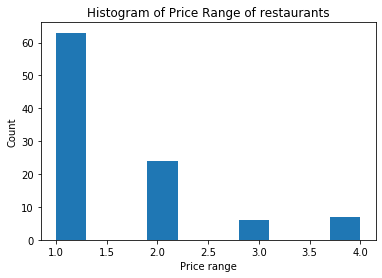

In [40]:

# Histogram of the price range of the restaurants
result_chennai.hist(column='Price_range', sharex=True, sharey=True)
plt.title("Histogram of Price Range of restaurants")
plt.xlabel("Price range")
plt.ylabel("Count")
plt.grid(False)


From the above chart, it is evident that most of the top rated restaurants in Chennai fall under the first price_range slot and hence, we can conclude that the **Top rated restaurants are Economical in Chennai**

Text(0, 0.5, 'Count')

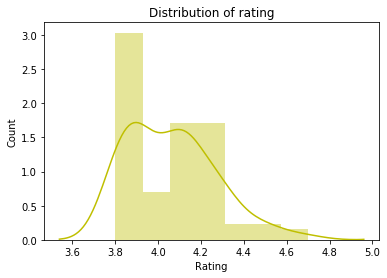

In [41]:
# Plot displaying the distribution of Aggregate_rating
sns.distplot(result_chennai['Aggregate_rating'], color="y")
plt.title("Distribution of rating")
plt.xlabel("Rating")
plt.ylabel("Count")

From the above chart we can conclude, 
**Out of the top 100 restaurants, most of them have a rating between 3.8 and 4.3**

Text(0, 0.5, 'Count')

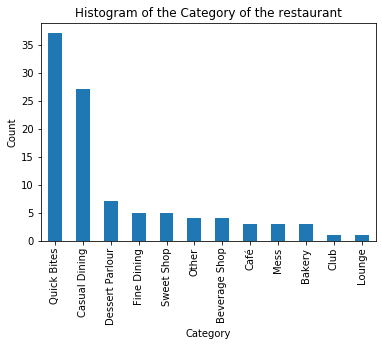

In [42]:
#Histogram of the Category of the restaurant
result_chennai['Category'].value_counts().plot(kind='bar')
plt.title("Histogram of the Category of the restaurant")
plt.xlabel("Category")
plt.ylabel("Count")

From the above graph, we can see the categories of restaurants that people highly pick. 
**Quick Bites, Casual Dining, Desert Parlour are the top three categories in the top 100 restaurants**

Text(0, 0.5, ' ')

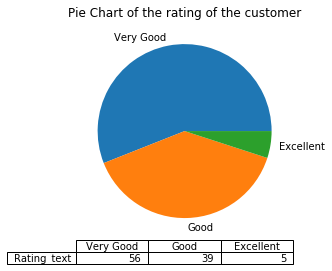

In [43]:
# Proportion of the text ratings given for each restaurant

result_chennai['Rating_text'].value_counts().plot(kind='pie',table=True)
plt.title("Pie Chart of the rating of the customer")
plt.xlabel(" ")
plt.ylabel(" ")

Owing to the fact that the data corresponds to the top 100 rated restaurants, majority of the restaurants have got the rating as 'Very Good'.
(Since the reviews are obatined from an unsupervised platfrom, gibberish data is likely to be obatined)

In [44]:
# Ratings the restaurants have obatined
result_chennai['Aggregate_rating'].value_counts().sort_index()

3.8    16
3.9    23
4.0     9
4.1    22
4.2    12
4.3    10
4.4     3
4.5     3
4.6     1
4.7     1
Name: Aggregate_rating, dtype: int64

Out of the top 100 restaurants in Chennai, **22 restaurants have each got a rating of 3.9 and 4.2**

------------------------------------------------------------------------------------------------------------------------------

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Density and Scatter Plot</p>

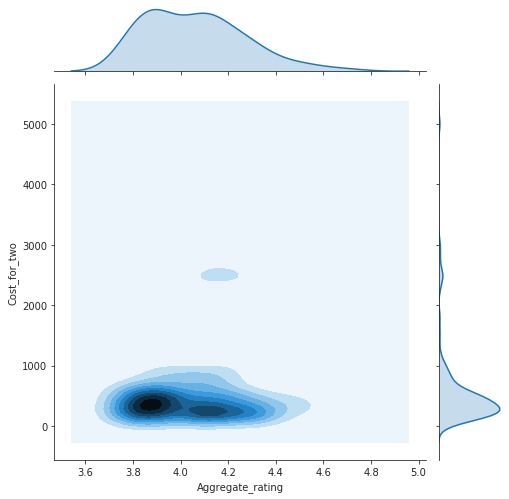

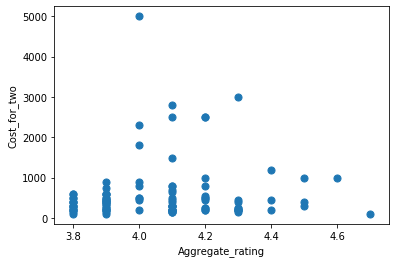

In [45]:
# Density plot using the seaborn package
# Plotting the Aggregate_rating against the cost_for_two variable
with sns.axes_style('ticks'):
    sns.jointplot(x="Aggregate_rating", y="Cost_for_two", data=result_chennai, kind="kde", height = 7)

    
result_chennai.plot.scatter(x="Aggregate_rating", y="Cost_for_two", s=50 )



* From the density plot, it is observed that the pitch of the plot is darker for rating between 3.8 and cost_for_two between 100 and 600

* Out of the top 100 restaurants in Chennai, there are may restaurants with aggregate_rating between 3.8 and cost_for_two between 100 and 600

-------------------------------------------------------------------------------------------------------------------------------


<p style="font-family: Arial; font-size:1.4em;color:blue;"> Scatter Matrix </p>

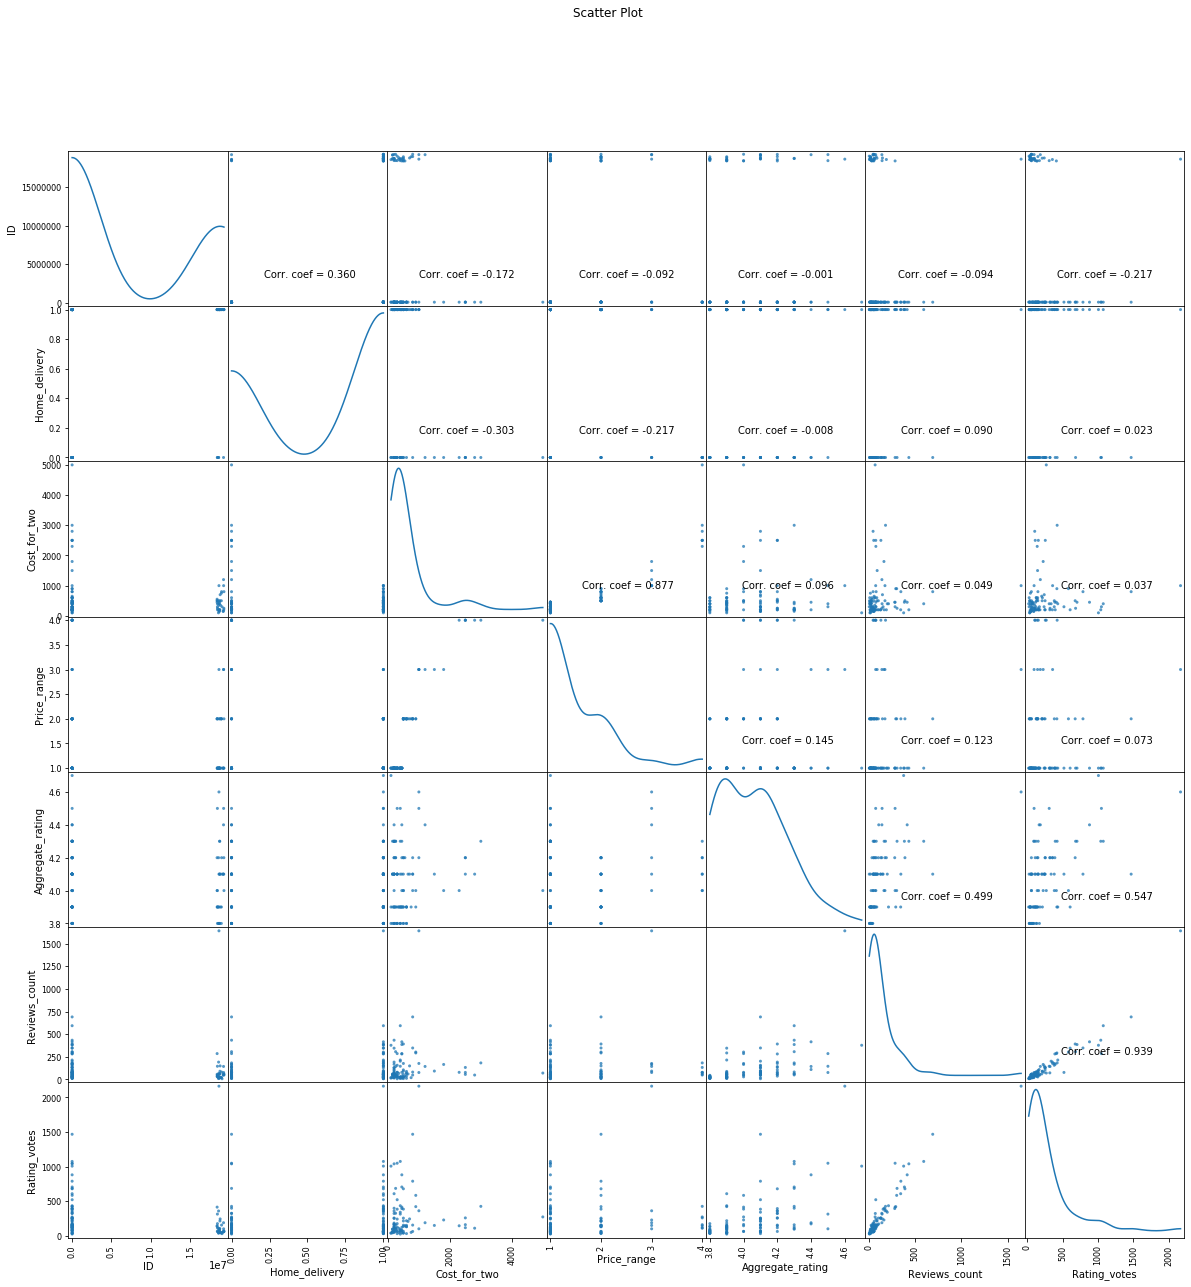

In [46]:
# Scatter matrix
from pandas.plotting import scatter_matrix

sca_mat=scatter_matrix(result_chennai, alpha=0.75, figsize=[20,20], diagonal='kde')

corr = result_chennai.corr()
corrs = result_chennai.corr().values

for i, j in zip(*plt.np.triu_indices_from(sca_mat, k = 1)):
    sca_mat[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='center', size=10)

plt.suptitle('Scatter Plot')
plt.show()

Upon the obersvation from the above scatter plot, we can conclude there's a strong positive correaltion between 'Reviews_count' and 'Rating_votes'.
**Hence, higher the number of reviwes, higher is the count of rating**

-------------------------------------------------------------------------------------------------------------------------------

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Correlation Plot </p>

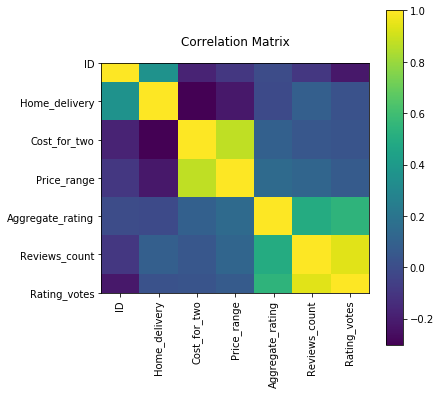

In [47]:
# CORRELATION PLOT
if result_chennai.shape[1] < 2:
    print('The number of columns is less than 2 and hence correlation mamtrix can be plotted')
else: 
    plt.figure(figsize=(6,6),facecolor='w',edgecolor='k')
    corrMat = plt.matshow(result_chennai.corr(), fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix')
    plt.show()
        
      

Upon the obersvation from the above scatter plot, we can conclude **there's a strong positive correaltion between 'Reviews_count' & 'Rating_votes' and between 'Price_range' & 'Cost_for_two'**

------------------------------------------------------------------------------------------------------------------------------

## CONCLUSION:

From the above visualizations and analysis, insights about the top 100 restaurants in chennai are as follows:

* 60% of the top 100 restaurants have home delivery option
* Majority of the restaurants in the top 100 restaurants fall under in the lowest price range. Hence Top rated restaurants are economical
* Out of the top 100 restaurants, most of them have a rating between 3.8 and 4.3
* Quick Bites, Casual Dining, Desert Parlour are the top three categories in the top 100 restaurants
* Approximately, 55% of the restaurants have got a 'Very Good' as their rating
* Majority of the restaurants have got rating 3.9 or 4.2
* Density plot has the pitch darker for rating between 3.8 and cost_for_two between 100 and 600
* Strong positive correaltion between 'Reviews_count'&'Rating_votes' and 'Price_range' & 'Cost_for_two'

(Likewise, data of the other cities can be analysed to obtain observations on the above factors and further in-depth studies and tests could be carried out to test the statistical significance of the results)

